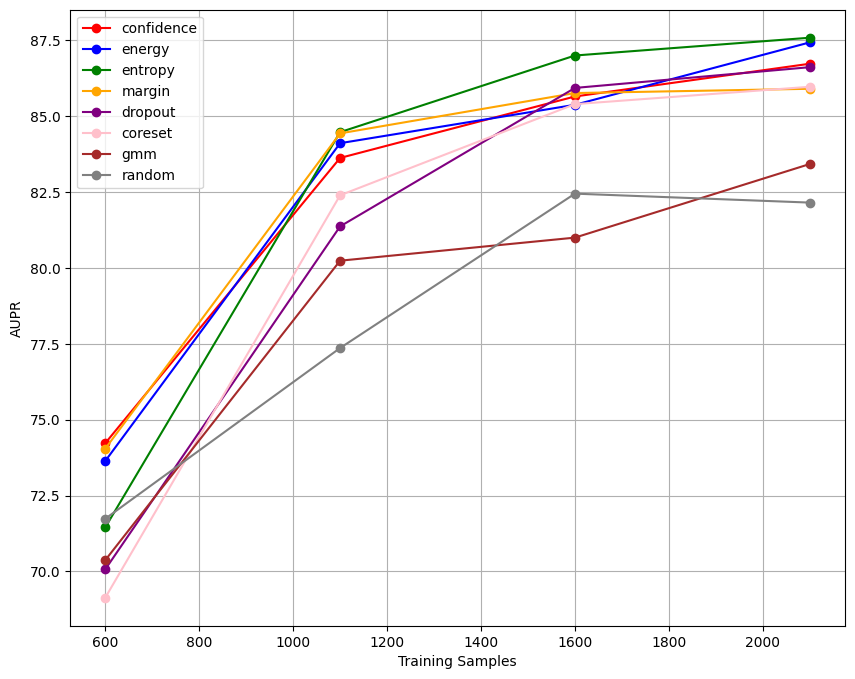

In [4]:
import matplotlib.pyplot as plt
import json
import os


# List of JSON file names
json_files = [
    "metrics_scibert_1_confidence_tabular.json",
    "metrics_scibert_1_energy_tabular.json",
    "metrics_scibert_1_entropy_tabular.json",
    "metrics_scibert_1_margin_tabular.json",
    "metrics_scibert_1_dropout_tabular.json",
    "metrics_scibert_1_coreset_tabular.json",
    "metrics_scibert_1_gmm_tabular.json",
    "metrics_scibert_1_random_tabular.json"
]

# Colors for plotting
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'gray']

# Plotting
plt.figure(figsize=(10, 8))
for i, file_name in enumerate(json_files):
    try:
        with open(os.path.join("../results", file_name), 'r') as file:
            data = json.load(file)
            # Extracting training samples and AUPR values from the "0" key
            training_samples = [entry['training_samples'] for entry in data['0'] \
                                if entry['training_samples'] in [600, 1100, 1600, 2100]]
            aupr_values = [entry['aupr'] for entry in data['0'] \
                           if entry['training_samples'] in [600, 1100, 1600, 2100]]
            plt.plot(training_samples, aupr_values, marker='o', label=file_name.split('_')[-2], color=colors[i])
    except FileNotFoundError:
        print(f"File {file_name} not found.")
    except Exception as e:
        print(f"Error processing {file_name}: {e}")

plt.xlabel('Training Samples')
plt.ylabel('AUPR')
# plt.title('AUPR vs Training Samples (Multiple Datasets)')
plt.grid(True)
plt.legend()
plt.savefig('aupr_comparison.png', dpi=150)
plt.show()

